In [ ]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 fetch_housing_data()
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)
housing=load_housing_data()
#housing.head()
print(HOUSING_PATH)

datasets/housing


# Mục mới

In [ ]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6229 to 10003
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16351 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


# Mục mới

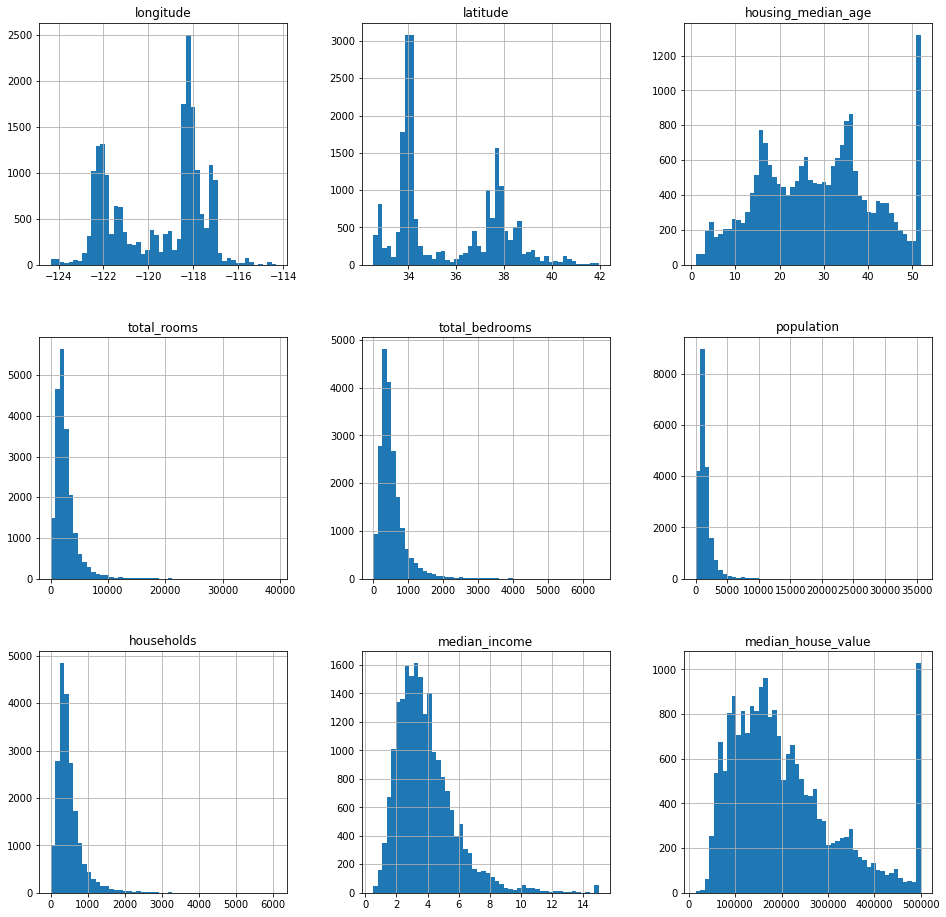

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(16,16))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=10)


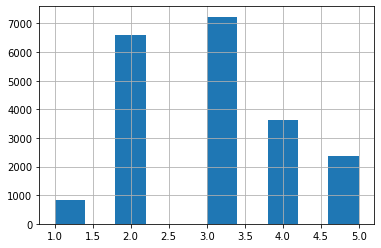

In [ ]:
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=10)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  print(train_index)
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
strat_test_set["income_cat"].value_counts()

[ 6229  4117 13371 ...  5607  9981 10003]


3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

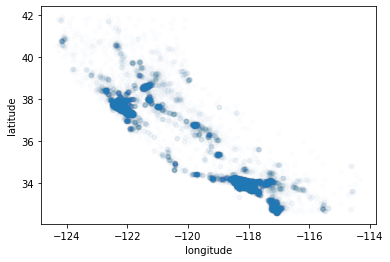

In [ ]:
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=0.01)  

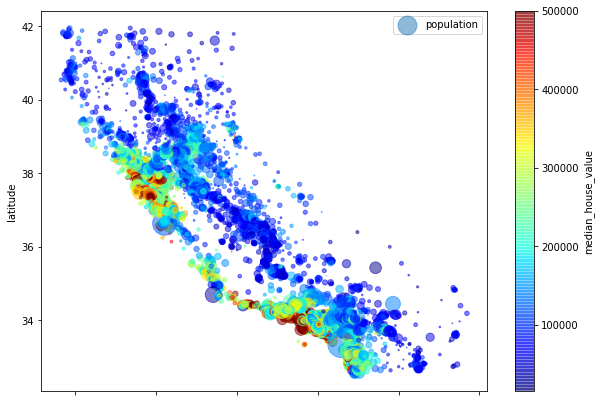

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,s=housing["population"]/50,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
#plt.legend()

In [ ]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

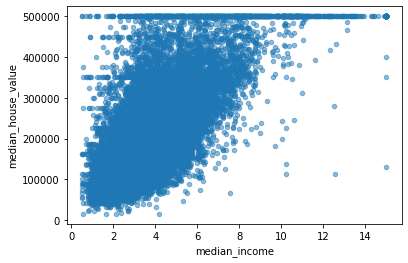

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5)

In [ ]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [ ]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [ ]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2129.     ,  435.     ,
       1164.     ,  410.     ,    3.53275,    3.     ])

In [ ]:
housing_num.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([-118.51   ,   34.26   ,   29.     , 2129.     ,  435.     ,
       1164.     ,  410.     ,    3.53275])

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [ ]:
#Tranform string attribute -> number attribute
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
6229,<1H OCEAN
4117,<1H OCEAN
13371,INLAND
16727,<1H OCEAN
7884,<1H OCEAN
293,NEAR BAY
17314,<1H OCEAN
11468,NEAR OCEAN
12079,INLAND
9036,INLAND


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
   self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
   return self # nothing else to do
 def transform(self, X, y=None):
   rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
   population_per_household = X[:, population_ix] / X[:, households_ix]
   if self.add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,
bedrooms_per_room]
   else:
    return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),("attribs_adder",CombinedAttributesAdder()),("std_scaler",StandardScaler())])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,3
4117,-118.22,34.14,52.0,2298.0,406.0,1203.0,387.0,5.5291,4
13371,-117.54,34.11,16.0,2114.0,374.0,1463.0,399.0,3.9241,3
16727,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667,3
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304,3
...,...,...,...,...,...,...,...,...,...
1355,-121.92,38.03,16.0,2176.0,464.0,1410.0,434.0,3.5436,3
13572,-117.28,34.14,40.0,2190.0,496.0,1214.0,493.0,2.3947,2
5607,-118.30,33.79,21.0,1068.0,283.0,1180.0,274.0,2.5000,2
9981,-122.27,38.53,22.0,678.0,137.0,336.0,103.0,4.4000,3


In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",OneHotEncoder(),cat_attribs)])
housing_prepared=full_pipeline.fit_transform(housing)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [ ]:
housing_labels

6229     210200.0
4117     274600.0
13371    131500.0
16727    250600.0
7884     194600.0
           ...   
1355     100200.0
13572     81900.0
5607     157500.0
9981     142500.0
10003    195200.0
Name: median_house_value, Length: 16512, dtype: float64

In [ ]:
#Make prediction
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("Prediction: ",lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))
some_data

Prediction:  [212579.54626535 303380.93786497 131338.72631786 240352.75045857
 204840.61288587]
Labels:  [210200.0, 274600.0, 131500.0, 250600.0, 194600.0]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,<1H OCEAN,3
4117,-118.22,34.14,52.0,2298.0,406.0,1203.0,387.0,5.5291,<1H OCEAN,4
13371,-117.54,34.11,16.0,2114.0,374.0,1463.0,399.0,3.9241,INLAND,3
16727,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667,<1H OCEAN,3
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304,<1H OCEAN,3


In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68090.68094606996

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [ ]:
tree_rmse_scores

array([70354.71961994, 73744.86144889, 71643.78258835, 72354.5135031 ,
       74603.97463394, 69864.24044501, 69369.85561819, 69504.58056301,
       73365.3694543 , 70652.49857732])

In [ ]:
def display(scores):
  print("Scores: ", scores)
  print("Mean: ",scores.mean())
  print("Standard deviation: ", scores.std())
display(tree_rmse_scores)

Scores:  [70354.71961994 73744.86144889 71643.78258835 72354.5135031
 74603.97463394 69864.24044501 69369.85561819 69504.58056301
 73365.3694543  70652.49857732]
Mean:  71545.83964520611
Standard deviation:  1791.8807893339933


In [ ]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse=np.sqrt(-lin_scores)
display(lin_rmse)

Scores:  [69922.54977147 67636.26658088 72375.17182518 70579.31750082
 68968.81053219 66516.42163271 70569.27910595 66020.06458465
 66550.01900951 65867.64076453]
Mean:  68500.55413078904
Standard deviation:  2177.803969360049


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)


RandomForestRegressor()

In [ ]:
forest_rmse_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse=np.sqrt(forest_rmse_scores)
forest_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
import joblib
joblib.dump(lin_reg,"model.pkl")
my_model_loaded=joblib.load("model.pkl")

# Mục mới

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= [{"n_estimators":[3,10,30],"max_features":[2,4,6,8]},{"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
cv_res=grid_search.cv_results_
for mean_score,params in zip(cv_res["mean_test_score"],cv_res["params"]):
  print(np.sqrt(-mean_score),params)

63323.75406011119 {'max_features': 2, 'n_estimators': 3}
55983.3050494385 {'max_features': 2, 'n_estimators': 10}
53177.897132422186 {'max_features': 2, 'n_estimators': 30}
60780.46469468223 {'max_features': 4, 'n_estimators': 3}
52730.06665416058 {'max_features': 4, 'n_estimators': 10}
51381.50494978375 {'max_features': 4, 'n_estimators': 30}
59984.010887744116 {'max_features': 6, 'n_estimators': 3}
52774.80454735542 {'max_features': 6, 'n_estimators': 10}
50943.36617482846 {'max_features': 6, 'n_estimators': 30}
60123.17861077637 {'max_features': 8, 'n_estimators': 3}
53030.77722464007 {'max_features': 8, 'n_estimators': 10}
50807.98924469519 {'max_features': 8, 'n_estimators': 30}
62554.67481517612 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54558.4797225554 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60464.91533610346 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52941.97909428337 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.17240207e-02, 5.33137940e-02, 4.59814704e-02, 1.63201307e-02,
       1.50496765e-02, 1.54666127e-02, 1.54260977e-02, 3.03833423e-01,
       1.29778036e-01, 4.10792643e-02, 1.08464548e-01, 4.62383974e-02,
       5.15588860e-03, 1.35442496e-01, 2.20431484e-04, 2.56804073e-03,
       3.93767250e-03])

In [ ]:
extra_attribs=['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']
cat_onehot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_onehot_attribs
sorted(zip(feature_importances,attributes),reverse=True)


[(0.30383342256937207, 'median_income'),
 (0.1354424956390898, 'INLAND'),
 (0.12977803631139279, 'income_cat'),
 (0.1084645477285072, 'pop_per_hhold'),
 (0.06172402073745469, 'longitude'),
 (0.05331379403368081, 'latitude'),
 (0.046238397394987425, 'bedrooms_per_room'),
 (0.045981470418850805, 'housing_median_age'),
 (0.04107926426712586, 'rooms_per_hhold'),
 (0.01632013067788711, 'total_rooms'),
 (0.01546661266803313, 'population'),
 (0.015426097687157551, 'households'),
 (0.015049676549399706, 'total_bedrooms'),
 (0.0051558886017149365, '<1H OCEAN'),
 (0.003937672500634088, 'NEAR OCEAN'),
 (0.002568040731167607, 'NEAR BAY'),
 (0.00022043148354440842, 'ISLAND')]

In [ ]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop(['median_house_value'],axis=1)
y_test=strat_test_set['median_house_value'].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_prediction=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)


In [ ]:
final_rmse

49278.590981201305

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import expon,reciprocal
params_distribs=  {"kernel":['linear','rbf'],
                   'C':reciprocal(20,200000),
                   'gamma': expon(scale=1.0)}
svm=SVR()
rnd_search=RandomizedSearchCV(svm,param_distributions=params_distribs,
                              n_iter=10,cv =5,scoring='neg_mean_squared_error',
                              verbose=2,random_state=42)
rnd_search.fit(housing_prepared,housing_labels)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.8s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, k

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbbce47a990>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbbcde94a10>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
negative_mse=rnd_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

55102.27258891357

In [ ]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

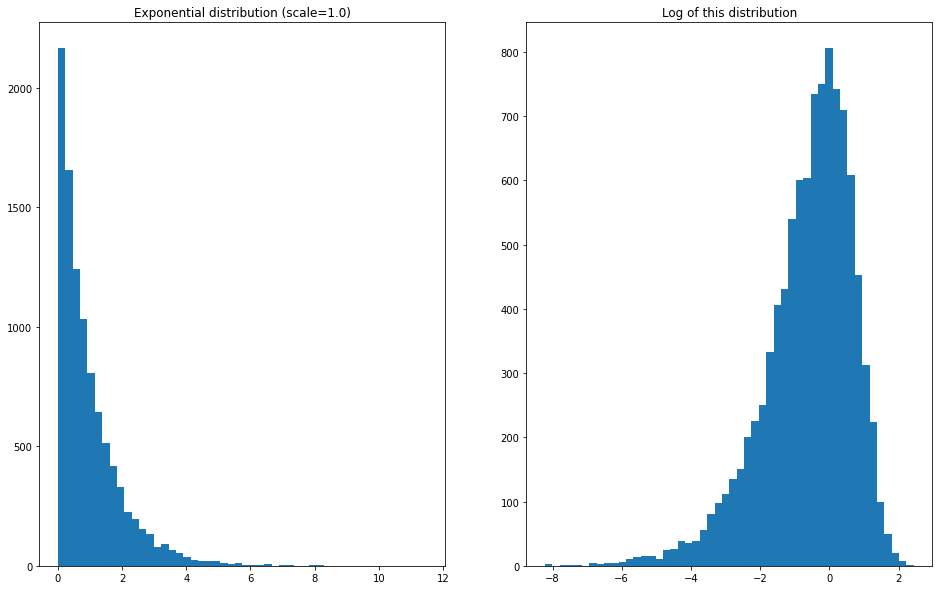

In [ ]:
expon_distrib=expon(scale=1.)
samples=expon_distrib.rvs(10000,random_state=10)
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples,bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=50)
plt.show()

In [ ]:
import joblib
joblib.dump(forest_reg,'forest_reg')
my_model=joblib.load('forest_reg')